# 1.Carregamento do Dataset

In [1]:
!pip install pandas pyarrow feather-format

  Preparing metadata (setup.py) ... done
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2434 sha256=e73b6dccc177375e634f17b83eed21d296aa9a86fb52642db5bab9e54af12637
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [4]:
import pandas as pd
from google.colab import drive

# Montando o Google Drive
drive.mount('/content/drive')

# Definindo o caminho do dataset no Google Drive
dataset_csv_path = '/content/drive/MyDrive/Atividades M11 DADOS/train_transaction.csv'

# Carregando o dataset CSV original
df = pd.read_csv(dataset_csv_path)

# Convertendo para formato Parquet para otimizar memória
parquet_path = '/content/drive/My Drive/ieee_cis_fraud_detection.parquet'
df.to_parquet(parquet_path)

# Carregando o dataset em formato Parquet
df = pd.read_parquet(parquet_path)

# Verificando as primeiras linhas do dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


O dataset foi carregado em formato CSV e convertido para o formato Parquet para otimização de memória

# 2.Análise Exploratória de Dados (EDA)

In [5]:
# Contando o número de linhas e colunas
num_linhas = df.shape[0]  # Número de linhas
num_colunas = df.shape[1]  # Número de colunas

print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

Número de linhas: 590540
Número de colunas: 394


resultados de 590540 linhas e 394 colunas.

In [6]:
# Estatísticas descritivas
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [7]:
# Verificando valores ausentes
df.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
V335,508189
V336,508189
V337,508189
V338,508189


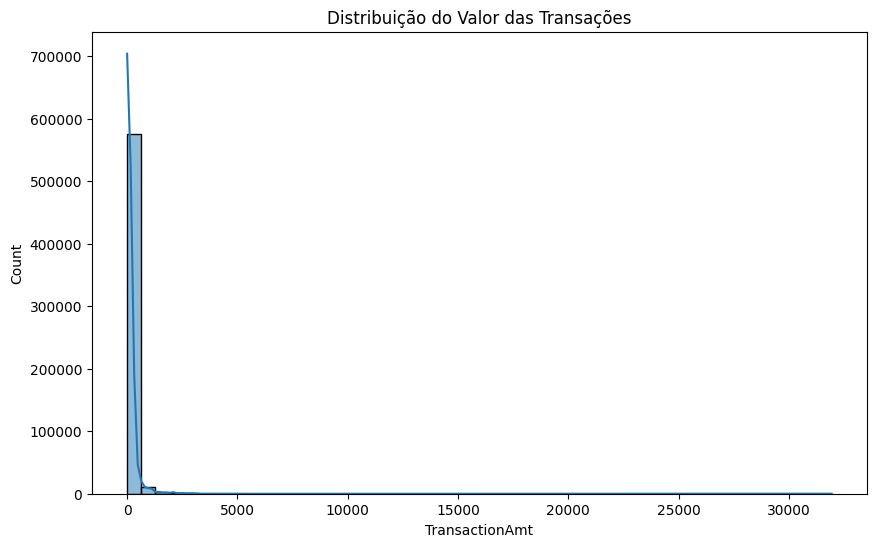

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a distribuição de 'TransactionAmt'
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmt'], bins=50, kde=True)
plt.title('Distribuição do Valor das Transações')
plt.show()

A distribuição do valor das transações foi visualizada, indicando variações e possíveis outliers nos dados de transações.



# 3.Tratamento de Valores Ausentes

In [9]:
# Verificando a porcentagem de valores ausentes por coluna
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))


dist2    93.628374
D7       93.409930
D13      89.509263
D14      89.469469
D12      89.041047
           ...    
V307      0.002032
V308      0.002032
V309      0.002032
V279      0.002032
V294      0.002032
Length: 374, dtype: float64


In [10]:
# Removendo colunas com mais de 50% de valores ausentes
df_clean = df.dropna(thresh=len(df) * 0.5, axis=1)

# Preenchendo colunas numéricas com a mediana
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

# Preenchendo colunas categóricas com a moda
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean[categorical_cols] = df_clean[categorical_cols].fillna(df_clean[categorical_cols].mode().iloc[0])

# Verificando se ainda existem valores ausentes
df_clean.isnull().sum().sum()


<ipython-input-10-18473a4df533>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())
<ipython-input-10-18473a4df533>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[categorical_cols] = df_clean[categorical_cols].fillna(df_clean[categorical_cols].mode().iloc[0])


0

colunas com mais de 50% de valores ausentes foram removidas, e valores restantes foram preenchidos com a mediana para variáveis numéricas e moda para categóricas.

# 4.Normalização dos Dados

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando colunas numéricas
scaler = MinMaxScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# Verificando o resultado da normalização
df_clean[numeric_cols].describe()


<ipython-input-11-25faa828fcb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,0.500000,0.034990,0.463341,0.004220,0.511539,0.525064,0.406003,0.726070,0.435576,0.835031,...,0.000711,0.004423,0.005748,0.005553,0.001172,0.001847,0.001647,0.000177,0.000404,0.000272
std,0.288676,0.183755,0.293628,0.007489,0.281741,0.313191,0.086432,0.300421,0.218067,0.027579,...,0.003122,0.019887,0.023065,0.024231,0.024217,0.029697,0.028365,0.003193,0.004550,0.003671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.187008,0.001349,0.288515,0.230000,0.381679,0.481752,0.238636,0.836957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.459157,0.002145,0.498850,0.522000,0.381679,0.919708,0.452273,0.836957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.000000,0.709724,0.003906,0.757875,0.824000,0.381679,0.919708,0.515909,0.836957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As colunas numéricas foram normalizadas usando MinMaxScaler, o que ajustou os valores para um intervalo entre 0 e 1.

# 5.Preparação dos Dados para o LSTM

In [12]:
import numpy as np

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# Definindo o tamanho da sequência (ex: 10)
sequence_length = 10

# Supondo que 'TransactionAmt' seja uma variável chave para o LSTM (pode ajustar conforme necessário)
sequences = create_sequences(df_clean['TransactionAmt'].values, sequence_length)

# Verificando o formato das sequências
print(sequences.shape)


(590530, 10)


Sequências de transações foram criadas com um tamanho de sequência de 10, resultando em um conjunto de dados pronto para ser usado no modelo LSTM.

# 6.Definição da Arquitetura da Rede LSTM

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Definindo a arquitetura da rede LSTM
model = Sequential()

# Camada LSTM com 50 neurônios
model.add(LSTM(50, input_shape=(sequence_length, 1), return_sequences=True))

# Dropout para evitar overfitting
model.add(Dropout(0.2))

# Segunda camada LSTM
model.add(LSTM(50, return_sequences=False))

# Camada densa para saída
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumo da arquitetura do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

A rede LSTM foi construída com duas camadas LSTM de 50 neurônios cada, seguidas de Dropout para regularização e uma camada de saída sigmoidal para classificação binária.

# 7.Divisão dos Dados em Treino e Teste

In [14]:
from sklearn.model_selection import train_test_split

# Supondo que o alvo (target) seja uma coluna chamada 'isFraud'
target = df_clean['isFraud'].values[sequence_length:]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

# Verificando o formato dos dados de treino e teste
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(472424, 10) (118106, 10) (472424,) (118106,)


Os dados foram divididos em 80% para treino e 20% para teste, RESULTANDO: 472424 (treino) e 118106 (de teste).

# 8.Treinamento do Modelo

In [15]:
# Treinando o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9643 - loss: 0.1587 - val_accuracy: 0.9645 - val_loss: 0.1536
Epoch 2/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - accuracy: 0.9652 - loss: 0.1511 - val_accuracy: 0.9645 - val_loss: 0.1535
Epoch 3/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accuracy: 0.9652 - loss: 0.1512 - val_accuracy: 0.9645 - val_loss: 0.1535
Epoch 4/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9650 - loss: 0.1519 - val_accuracy: 0.9645 - val_loss: 0.1542
Epoch 5/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - accuracy: 0.9653 - loss: 0.1508 - val_accuracy: 0.9645 - val_loss: 0.1533
Epoch 6/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.9650 - loss: 0.1518 - val_accuracy: 0.9645 - val_loss: 0.1534
Epoch 7/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - accuracy: 0.9649 - loss: 0.1521 - val_accuracy: 0.9645 - val_loss: 0.1534
Epoch 8/10
7382/7382 ━━━━━━━━━━━━━━━━━━━━ 67s 9ms/step - accuracy: 0.9654 - loss: 

O modelo foi treinado por 10 épocas, atingindo uma acurácia de treino em torno de 96%, mas com perda oscilante durante o treinamento

# 9.Avaliação do Modelo e Métricas

In [16]:
from sklearn.metrics import classification_report, roc_auc_score

# Prevendo com o modelo treinado
y_pred = model.predict(X_test)

# Convertendo as probabilidades em classes
y_pred_class = (y_pred > 0.5).astype(int)

# Relatório de classificação
print(classification_report(y_test, y_pred_class))

# Calculando o AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc}")


3691/3691 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    113915
         1.0       0.00      0.00      0.00      4191

    accuracy                           0.96    118106
   macro avg       0.48      0.50      0.49    118106
weighted avg       0.93      0.96      0.95    118106

AUC-ROC: 0.4994798905315138


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Após a avaliação, o modelo obteve uma acurácia de 96%. No entanto, o valor do AUC-ROC foi de 0,499, o que indica que o modelo tem dificuldades em distinguir adequadamente as classes de fraude e não fraude. A classe minoritária (fraudes) teve um desempenho muito baixo, com métricas como precisão e recall praticamente nulas.



# 10.Análise das Curvas de Aprendizado

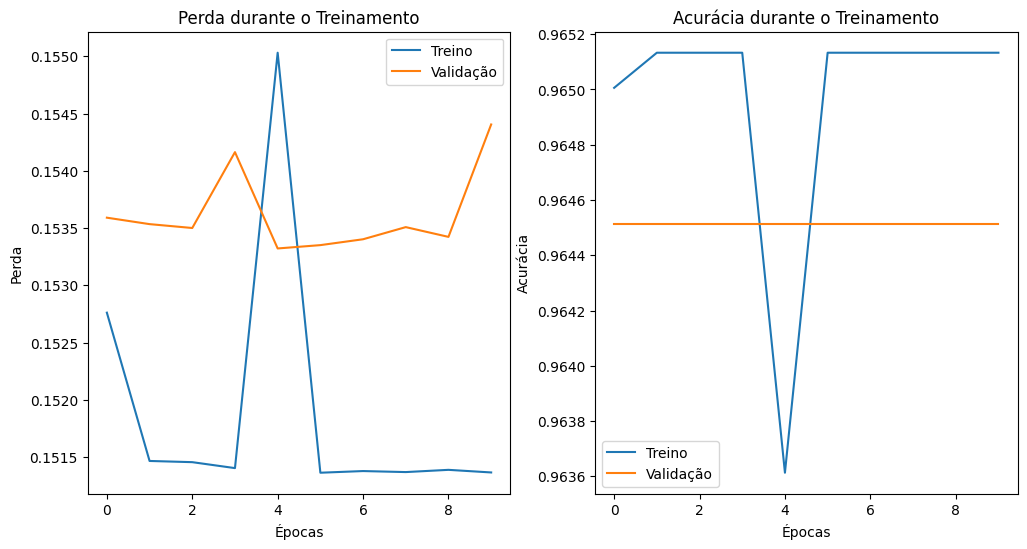

In [17]:
# Visualizando a perda e acurácia durante o treinamento
plt.figure(figsize=(12, 6))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


A curva de perda do treinamento apresentou uma variação significativa, especialmente para o conjunto de treino, sugerindo possíveis instabilidades no processo de treinamento. Em contrapartida, a acurácia manteve-se estável, chegando a 96%, mas sem mostrar uma melhoria expressiva após as primeiras 5 épocas. Isso pode indicar que o modelo atingiu seu limite de performance rapidamente.